In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Colorblind friendly colors
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# PARAMETERS to Change

# Save location
savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\cluster-analysis"

# File path to folder containing csv files with cluster measurements
ddir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\ROI1_cluster_measures.csv"

# base name of files (should all be the same except for the '_#' at the end but don't include that here)
dname = "ROI"

ver = 'V1' #version name for files to not overwrite old ones

# number of files to analyze
fnum = 1

# Localizations per NPC; list with average localizations per NPC for each experiment in order
locs = np.array([53.7156,39.5063,26.9495])
# the number of localizations per LABELED mEGFP. It is used to determine what the minimum # of events is for a
# cluster to be included in the analysis. This helps normalize the data
tru_locs = np.array([4.09, 3.14, 2.46]) 
#locs = np.array([26.9495])
#number of nups per NPC
nups = 32 

# Max cluster size -> filter out clusters with more events than this number
upper = 100 # set to 0 if you do not want to filter out any clusters
# Minimum cluster size -> filter out clusters with less events than this number
lower = 0 # set to 0 if you do not want to filter out any clusters

# color list -> should be as long as the number of datasets you're analyzing
#colors = ['lime','magenta','cyan']
#colors = ['tab:blue', 'tab:red', 'tab:olive']
colors = [CB_color_cycle[0], CB_color_cycle[1], CB_color_cycle[2]]
names = ['Exp. 1', 'Exp. 2', 'Exp. 3']

# Don't touch
cluster_list = []
for a in range(fnum):
    cluster_list.append(ddir+'\\'+dname+'_'+str(int(a+1))+'.csv')

In [2]:
# Read the .csv files and put values in dictionary 'clust' which gets assigned to numpy array clust_all
# So clust_all is an array of dictionaries
avg_locs = locs/nups
clust_all = np.zeros(fnum,dtype=list)
for b in range(fnum):
    c_data = np.genfromtxt(cluster_list[b], delimiter = ',')
    clust = {'objectID': c_data[1:,0], 'xpos': c_data[1:,1], 'ypos': c_data[1:,2], 'NEvents': c_data[1:,3], 
             'Area': c_data[1:,4], 'Perimeter': c_data[1:,5], 'MajorAxisAngle': c_data[1:,6], 'stdMajor': c_data[1:,7], 
             'stdMinor': c_data[1:,8], 'lengthMajor': c_data[1:,9], 'lengthMinor': c_data[1:,10], 'moments': c_data[1:,11],
             'momentErrors': c_data[1:,12]}
    # Filter out clusters with too many events according to 'upper'
    if upper > 0:
        filt = clust['NEvents'] <= upper
        clust['NEvents'] = clust['NEvents'][filt]
    if tru_locs[b] > 0:
        low_filt = clust['NEvents'] > tru_locs[b]
        clust['NEvents'] = clust['NEvents'][low_filt]
    # Calculate how many proteins are in each cluster according to 'locs' and 'nups'
    clust['nProtein'] = clust['NEvents']/avg_locs[b]
    clust_all[b] = clust
    del clust, c_data

In [3]:
np.average(tru_locs)

3.2300000000000004

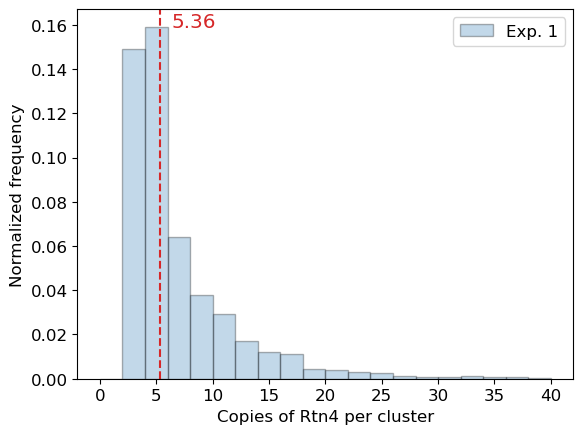

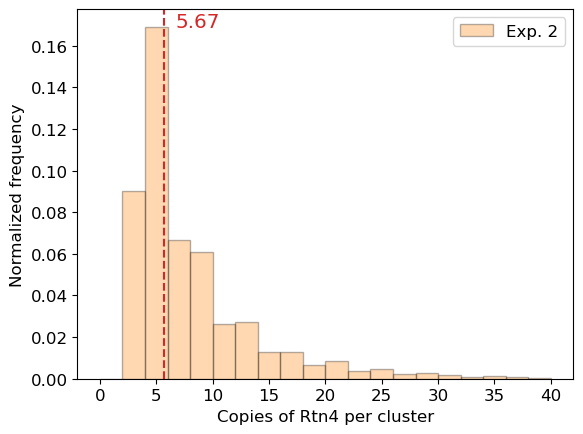

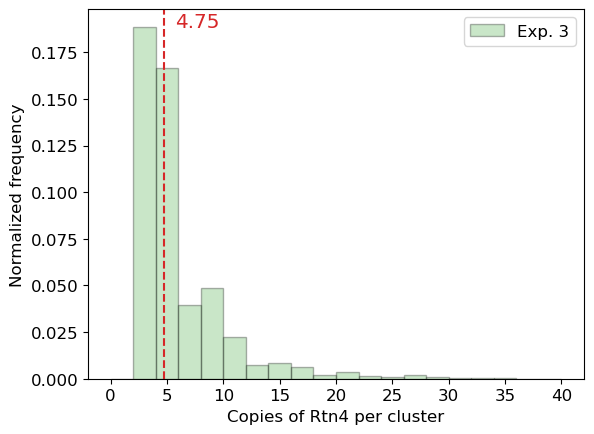

In [4]:
plt.rcParams.update({'font.size': 12})
for c in range(fnum):
    med = np.median(clust_all[c]['nProtein'])
    n, bins, patches = plt.hist(x=clust_all[c]['nProtein'],bins=20, alpha=0.3, rwidth=1, density=True, 
                                color=colors[c],range=(0,40), 
                                label='Exp. ' + str(int(c+1)),edgecolor='k' )

    n_max = np.max(n,axis=0)
    plt.axvline(x=med, linestyle='--',color='tab:red',alpha=1)
    plt.text(med+1,np.max(n_max),str(np.round(med,2)),color='tab:red', fontsize='large')
    plt.xlabel('Copies of Rtn4 per cluster')
    plt.ylabel('Normalized frequency')
    plt.legend()
    # hist_save = savedir + '\\' + dname + '_'+str(int(c+1))+'hist_' + ver + '.png'
    # plt.savefig(hist_save, dpi=600, facecolor='w', edgecolor='w',
    #         orientation='portrait', papertype=None, format=None,
    #         transparent=False, bbox_inches=None, pad_inches=0.1,
    #         frameon=None, metadata=None)
    plt.show()
    #plt.close(fig=None)

C:\Users\laf62\.conda\envs\pyme\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


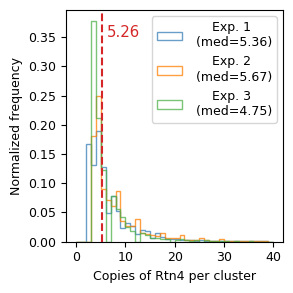

In [64]:
# Create histogram with all experiments
plt.close(fig=None)

plt.rcParams.update({'font.size': 9})
n_all = np.zeros(fnum,dtype=list)
bins_all = np.zeros(fnum,dtype=list)
patches_all = np.zeros(fnum,dtype=list)
med_all = np.zeros(fnum,dtype=list)
fig = plt.figure(figsize=[3,3])
for c in range(fnum):
    med = np.median(clust_all[c]['nProtein'])
    n, bins, patches = plt.hist(x=clust_all[c]['nProtein'],bins=40, alpha=0.75, rwidth=1, density=True, 
                                color=CB_color_cycle[c],range=(0,40), 
                                label='     Exp. ' + str(int(c+1))+ '\n (med=' + str(np.round(med,2))+')',
                                edgecolor=CB_color_cycle[c], linewidth=1, histtype='step')
    # Add dashed line at average value for d1
    #plt.axvline(x=med, linestyle='--',color=colors[c],alpha=0.5)
    # Add average value as text on plot near top of average line for d1
    #plt.text(med+10,np.max(n)/(c+1),str(np.round(med,2)),color=colors[c], fontsize='large')
    n_all[c] = n
    bins_all[c] = bins
    patches_all[c] = patches
    med_all[c] = med
    del n, bins, patches, med

med_avg = np.average(med_all,axis=0)
n_avg = np.average(n_all,axis=0)
n_std = np.std(n_all,axis=0)
plt.axvline(x=med_avg, linestyle='--',color='tab:red',alpha=1)
plt.text(med_avg+1,np.max(n_avg)+0.1,str(np.round(med_avg,2)),color='tab:red', fontsize='large')
plt.xlabel('Copies of Rtn4 per cluster')
plt.ylabel('Normalized frequency')
#ticks = np.linspace(0,0.40,9)
#plt.yticks(ticks,ticks)#[0.05,0.10,0.15],[0.05,0.10,0.15])
plt.legend()
plt.tight_layout()
hist_save = savedir + '\\' + dname + '_' + ver + '.png'
plt.savefig(hist_save, dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0,
        frameon=None, metadata=None)
plt.show()
plt.close(fig=None)

C:\Users\laf62\.conda\envs\pyme\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


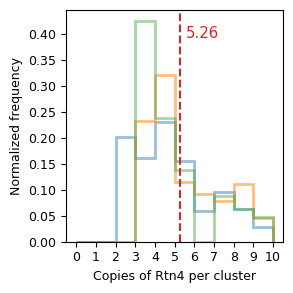

In [ ]:
# Create histogram with all experiments
plt.close(fig=None)

plt.rcParams.update({'font.size': 9})
n_all = np.zeros(fnum,dtype=list)
bins_all = np.zeros(fnum,dtype=list)
patches_all = np.zeros(fnum,dtype=list)
med_all = np.zeros(fnum,dtype=list)
fig = plt.figure(figsize=[3,3])
for c in range(fnum):
    med = np.median(clust_all[c]['nProtein'])
    n, bins, patches = plt.hist(x=clust_all[c]['nProtein'],bins=10, alpha=0.5, rwidth=1, density=True, 
                                color=CB_color_cycle[c],range=(0,10), 
                                label='     Exp. ' + str(int(c+1))+ '\n (med=' + str(np.round(med,2))+')',
                                edgecolor=CB_color_cycle[c], linewidth=2, histtype='step')
    # Add dashed line at average value for d1
    #plt.axvline(x=med, linestyle='--',color=colors[c],alpha=0.5)
    # Add average value as text on plot near top of average line for d1
    #plt.text(med+10,np.max(n)/(c+1),str(np.round(med,2)),color=colors[c], fontsize='large')
    n_all[c] = n
    bins_all[c] = bins
    patches_all[c] = patches
    med_all[c] = med
    del n, bins, patches, med

med_avg = np.average(med_all,axis=0)
n_avg = np.average(n_all,axis=0)
n_std = np.std(n_all,axis=0)
plt.axvline(x=med_avg, linestyle='--',color='tab:red',alpha=1)
plt.text(med_avg+0.3,np.max(n_avg)+.12,str(np.round(med_avg,2)),color='tab:red', fontsize='large')
plt.xlabel('Copies of Rtn4 per cluster')
plt.ylabel('Normalized frequency')
xticks = np.linspace(0,10,11)
plt.xticks(xticks)
#ticks = np.linspace(0,0.18,4)
#plt.yticks(ticks,ticks)#[0.05,0.10,0.15],[0.05,0.10,0.15])
#plt.legend()
plt.tight_layout()
hist_small_save = savedir + '\\' + dname + '_small_clusts_' + ver + '.png'
plt.savefig(hist_small_save, dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0,
        frameon=None, metadata=None)
plt.show()
plt.close(fig=None)

C:\Users\laf62\.conda\envs\pyme\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


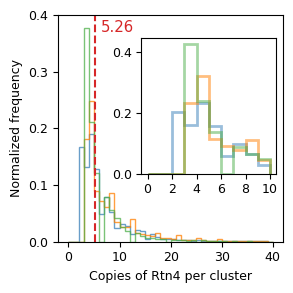

In [123]:
# Create histogram with all experiments
plt.close(fig=None)
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
plt.rcParams.update({'font.size': 9})
n_all = np.zeros(fnum,dtype=list)
bins_all = np.zeros(fnum,dtype=list)
patches_all = np.zeros(fnum,dtype=list)
med_all = np.zeros(fnum,dtype=list)
fig, ax1 = plt.subplots(figsize=[3,3])
for c in range(fnum):
    med = np.median(clust_all[c]['nProtein'])
    n, bins, patches = plt.hist(x=clust_all[c]['nProtein'],bins=40, alpha=0.75, rwidth=1, density=True, 
                                color=CB_color_cycle[c],range=(0,40), 
                                label='     Exp. ' + str(int(c+1))+ '\n (med=' + str(np.round(med,2))+')',
                                edgecolor=CB_color_cycle[c], linewidth=1, histtype='step')
    # Add dashed line at average value for d1
    #plt.axvline(x=med, linestyle='--',color=colors[c],alpha=0.5)
    # Add average value as text on plot near top of average line for d1
    #plt.text(med+10,np.max(n)/(c+1),str(np.round(med,2)),color=colors[c], fontsize='large')
    n_all[c] = n
    bins_all[c] = bins
    patches_all[c] = patches
    med_all[c] = med
    del n, bins, patches

med_avg = np.average(med_all,axis=0)
n_avg = np.average(n_all,axis=0)
n_std = np.std(n_all,axis=0)
plt.axvline(x=med_avg, linestyle='--',color='tab:red',alpha=1)
plt.text(med_avg+1,np.max(n_avg)+0.14,str(np.round(med_avg,2)),color='tab:red', fontsize='large')
plt.xlabel('Copies of Rtn4 per cluster')
plt.ylabel('Normalized frequency')
ticks = np.around(np.linspace(0,0.40,5),1)
plt.yticks(ticks,ticks)#[0.05,0.10,0.15],[0.05,0.10,0.15])
#plt.legend()
plt.tight_layout()
ax2 = plt.axes([0,0,10,0.4])
ip = InsetPosition(ax1, [0.37,0.3,0.6,0.6])
ax2.set_axes_locator(ip)
for d in range(fnum):
    med = np.median(clust_all[d]['nProtein'])
    ax2.hist(x=clust_all[d]['nProtein'],bins=10, alpha=0.5, rwidth=1, density=True, 
             color=CB_color_cycle[d],range=(0,10), 
             label='     Exp. ' + str(int(d+1))+ '\n (med=' + str(np.round(med,2))+')',
             edgecolor=CB_color_cycle[d], linewidth=2, histtype='step')
#mark_inset(ax1, ax2, loc1=2, loc2=4,fc="none", ec='0.5')
inxticks = np.linspace(0,10,6)
ax2.set_xticks(inxticks)
inyticks = np.around(np.linspace(0,0.4,3),1)
ax2.set_yticks(inyticks)
inset_save = savedir + '\\' + dname + '_inset_' + ver + '.png'
plt.savefig(inset_save, dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0,
        frameon=None, metadata=None)
plt.show()
plt.close(fig=None)

In [98]:
fnum

3

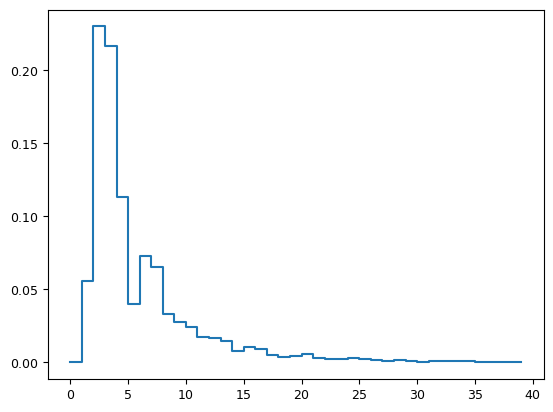

In [53]:
plt.step(bins_all[0][0:-1],n_avg)
plt.show()
plt.close(fig=None)
#len(bins_all[0][0:-1])

In [5]:
# Create list 'x' that is the centers of the bins
x = []
for f in range(len(bins_all[0])-1):
    x.append((bins_all[0][f]+bins_all[0][f+1])/2)
bin_width = (bins_all[0][1]-bins_all[0][0])

plt.close(fig=None)

# Average histogram of all experiments
plt.bar(x, n_avg, width=bin_width, label='Average', color='tab:blue', alpha=0.75, edgecolor = 'k',
        ecolor='tab:blue',yerr=n_std)
plt.axvline(x=med_avg, linestyle='--',color='tab:red',alpha=1)
plt.text(med_avg+1,np.max(n_avg),str(np.round(med_avg,2)),color='tab:red', fontsize='large')
plt.xlabel('Copies of Rtn4 per cluster')
plt.ylabel('Normalized frequency')
#plt.legend()
avg_save = savedir + '\\' + dname + '_' + ver + '_avg.png'
# plt.savefig(avg_save, dpi=300, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

In [13]:
# Determine number of counts of each oligomer size for simulation
n_all = np.zeros(fnum,dtype=list)
bins_all = np.zeros(fnum,dtype=list)
patches_all = np.zeros(fnum,dtype=list)
med_all = np.zeros(fnum,dtype=list)
fig = plt.figure()
for c in range(fnum):
    med = np.median(clust_all[c]['nProtein'])
    n, bins, patches = plt.hist(x=clust_all[c]['nProtein'],bins=40, alpha=0.3, rwidth=1, density=False, 
                                color=colors[c],range=(0,40), 
                                label='     Exp. ' + str(int(c+1))+ '\n (med=' + str(np.round(med,2))+')',edgecolor='k' )
    n_all[c] = n
    bins_all[c] = bins
    patches_all[c] = patches
    med_all[c] = med
    del n, bins, patches, med
    
n_avg = np.average(n_all)

count_info = {'frequency': n_avg, 'oli-size': bins_all[0]}
savedir2 = 'K:\\4Pi_data\\Oligomer_analysis\\Oligomer_analysis_V2\\updated_analysis_20230111'
save_count_info = savedir2 + '\\count_info_V1.npy'
np.save(save_count_info, count_info, allow_pickle=True)